In [1]:
# Configuracion para recargar módulos y librerías 
%reload_ext autoreload
%autoreload 2

# MAT281

## Aplicaciones de la Matemática en la Ingeniería

Puedes ejecutar este jupyter notebook de manera interactiva:

[![Binder](../shared/images/jupyter_binder.png)](https://mybinder.org/v2/gh/sebastiandres/mat281_m03_visualizacion/master?filepath=01_landscape/01_landscape.ipynb)

[![Colab](../shared/images/jupyter_colab.png)](https://colab.research.google.com/github/sebastiandres/mat281_m03_visualizacion/blob/master//01_landscape/01_landscape.ipynb)

## Intrucciones

- Completa tus datos personales (nombre y rol USM).
- Debes enviar este .ipynb con el siguiente formato de nombre: 0X_filename_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .
- Se evaluará:
    * Soluciones
    * Código
    * Al presionar  Kernel -> Restart Kernel and Run All Cells deben ejecutarse todas las celdas sin error.
- La escala es de 0 a 4 considerando solo valores enteros.
- __La entrega es al final de esta clase.__


__Nombre:__

__Rol:__

## ¿Qué contenido aprenderemos?

* Conocer librearías gráficas
* Tipos de visualizaciones

## Tema 1: Librerías gráficas

La mayor parte de esta parte del laboratorio está basada en la charla *[The Python Visualization Landscape](https://us.pycon.org/2017/schedule/presentation/616/)* realizada por [Jake VanderPlas](http://vanderplas.com/) en la PyCon 2017.

### Landscape

Estas eran algunas de las librerías gráficas relacionadas con Python más utilizadas en el año 2017 y que en realiadad no ha cambiado mucho a la fecha.  

![image](https://yeonghoey.com/pycon-2017/_img/screenshot_2017-08-23_23-07-05.png)

Cada una de estas librerías fueron creadas para satisfacer diferentes necesidades, algunas han ganado más adeptos que otras por uno u otro motivo. Tal como avanza la tecnología, estas librerías se actualizan o se crean nuevas, la importancia no recae en ser un experto en una, si no en saber adaptarse a las situaciones, tomar la mejor decicisión y escoger según nuestras necesidades y preferencias. Por ejemplo, `matplotlib` nació como una solución para imitar los gráficos de `MATLAB` (puedes ver la historia completa [aquí](https://matplotlib.org/users/history.html)), manteniendo una sintaxis similar y con ello poder crear gráficos __estáticos__ de muy buen nivel.

Debido al éxito de `matplotlib` en la comunidad, naces librerías basadas ella. Algunos ejemplos son:

- `pandas` posee métodos para sus objetos con tal de crear gráficos de manera muy rápida, e.g. `pandas.DataFrame.plot.bar()`
- `seaborn` se basa en `matpĺotlib` pero su nicho corresponde a las visualizaciones estadísticas.
- `ggpy` una suerte de copia a `ggplot2` perteneciente al lenguaje de programación `R`.
- `networkx` visualizaciones de grafos.

Por otro lado, con tal de crear visualizaciones __interactivas__ aparecen librerías basadas en `javascript`, algunas de las más conocidas en Python son:

- `bokeh` tiene como objetivo proporcionar gráficos versátiles, elegantes e incluso interactivos, teniendo una gran performance con grandes datasets o incluso streaming de datos.
- `plotly` visualizaciones interactivas que en conjunto a `Dash` (de la misma empresa) permite crear aplicaciones webs, similar a `shiny` de `R`.

`D3.js` a pesar de estar basado en `javascript` se ha ganado un lugar en el corazón de toda la comunidad, debido a la ilimitada cantidad de visualizaciones que son posibles de hacer, por ejemplo, la [malla interactiva](https://mallas.labcomp.cl/) que hizo un estudiante de la UTFSM está hecha en `D3.js`. 

De las librerías más recientes está `Altair`, que consiste en visualizaciones declarativas (ya lo veremos en el próximo laboratorio). Construída sobre `Vega-Lite`, a su vez que esté está sobre `Vega` y este finalmente sobre `D3.js`. `Altair` permite crear visualizaciones estáticas e interactivas con pocas líneas de código, sin embargo, al ser relativamente nueva, aún existen funcionalidades en desarrollo o que simplemente aún no existen en esta librería pero en otras si.

#### Clasificación

En lo concierne a nosotros, una de las principales clasificaciones para estas librerías es si crean visualizaciones __estática__ y/o __interactivas__. La interactividad es un plus que permite adentrarse en los datos en distintos niveles, si agregamos que ciertas librerías permiten crear _widgets_ (algo así como complementos a las visualizaciones) su potencial aumenta. Por ejemplo, un widget podría ser un filtro que permita escoger un país; en una librería estática tendrías que crear un gráfico por cada país (o combinación de países) lo cual no se hace escalable y cómodo para trabajar. 

## Ejercicios Parte 1

1.1 Imagina que te encuentras trabajando en una empresa de la industria como Ingeniero Civil Matemático, día a día procesas una gran cantidad de datos, creas modelos matemáticos, implementas algoritmos y finalmente debes presentar/entregar resultados a los clientes, quienes quieren explorar tus resultados. ¿Cuál(es) librerías gráficas utilizarías?

* __R:__ Ocuparía una librería interactiva, como D3js, Bokeh, Plotly o Altair, con tal que el cliente pueda explorar los resultados por su cuenta.

1.2 Imagina que eres un académico de alguna universidad, has trabajado meses en un artículo y requieres agregar visualizaciones antes de enviarlo a alguna revista a revisión. ¿Cuál(es) librerías gráficas utilizarías?

* __R:__ Ocuparía una librería con buenas visualizaciones estáticas, como Matplotlib o Altair. Si mi gráfico necesitase mucha personalización decantaría por matplotlib, debido a su gran potencial a la hora de personalizar.

## Tema 2: Tipos de visualizaciones

Esta sección corresponde a un resumen de visualización en la práctica, considerando los tipos de gráficos, algunas reglas generales y tips. En esta ocasión nos apoyaremos en la librería `matplotlib` por ser una de las más populares y permitir crear un sin fin de gráficos distintos.

### Previos

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes

# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

Los datos a utilizar en este laboratorio corresponden al catálogo de todas las canciones de _Metallica_ desde 1983 a 2016. Las columnas son:

| Type  | Column Name | Description |
| ------|------------ | ----------- |  
| Numeric | ID | SongID |
| Numeric | AlbumID | Album ID |
| String | Album | Album Name |
| String | Song | Song Title |
| Numeric | Disc | Disc Number |
| Numeric | TrackNumber | Track Number |
| Numeric | Year | Original release year |
| Numeric | Yeahs | Number of times "Yeah" is sang |
| Numeric | Minutes | Length minutes |
| Numeric | Seconds | Length seconds (remainder) |
| Numeric | LengthInSeconds | Total length in seconds |
| Numeric | YeahsPerSecond | Yeahs per second |
| Numeric | IsGold | Certified Gold (RIAA) |
| Numeric | IsPlatinum | Certified Platinum (RIAA) |
| Numeric | JamesHetfield | Writing Credits |
| Numeric | LarsUlrich | Writing Credits |
| Numeric | KirkHammett | Writing Credits |
| Numeric | CliffBurton | Writing Credits |
| Numeric | DaveMustaine | Writing Credits |
| Numeric | JasonNewstead | Writing Credits |
| Numeric | RobertTrujillo | Writing Credits |
| Numeric | LouReed | Writing Credits |
| Numeric | PlayedLive | Number of times played live (Metallica.com) |

In [3]:
metallica = pd.read_csv(os.path.join("data", "MetallicaData.csv"), encoding="utf-8")
metallica.head()

,ID,AlbumID,Album,Song,Disc,TrackNumber,Year,Yeahs,Minutes,Seconds,LengthInSeconds,YeahsPerSecond,IsGold,IsPlatinum,JamesHetfield,LarsUlrich,KirkHammett,CliffBurton,DaveMustaine,JasonNewstead,RobertTrujillo,LouReed,PlayedLive
0,1,1,Kill 'Em All,Hit The Lights,1,1,1983,3,4,15,255,0.011765,0,0,1,1,0,0,0,0,0,0.0,210
1,2,1,Kill 'Em All,The Four Horsemen,1,2,1983,4,7,12,432,0.009259,0,0,1,1,0,0,1,0,0,0.0,538
2,3,1,Kill 'Em All,Motorbreath,1,3,1983,0,3,7,187,0.000000,0,0,1,0,0,0,0,0,0,0.0,304
3,4,1,Kill 'Em All,Jump In The Fire,1,4,1983,0,4,41,281,0.000000,0,0,1,1,0,0,1,0,0,0.0,91
4,5,1,Kill 'Em All,(Anesthesia)--Pulling Teeth,1,5,1983,0,4,14,254,0.000000,0,0,0,0,0,1,0,0,0,0.0,125


### Gráfico de Barras (o _Bar Plots_)

Útiles cuando se quieren graficas dos variables, una de ellas categórica y la otra discreta o continua.

Ejemplo: Cantidad de canciones por álbum

In [4]:
songs_by_album = metallica.groupby("Album")["ID"].nunique()
albums = songs_by_album.index.values
nm_songs = songs_by_album.values

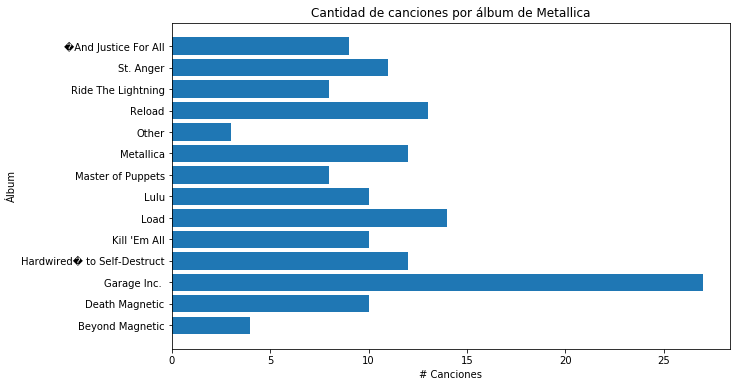

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(albums, nm_songs, align="center")
ax.set_xlabel("# Canciones")
ax.set_ylabel("Álbum")
ax.set_title("Cantidad de canciones por álbum de Metallica")
plt.show()

Como comentamos en la sección 1, `pandas` tiene su propia forma de llamar a `matplotlib`. Pero en ocasiones el compoortamiento no es el deseado, lo que se traduce en tiempo invertido en leer la documentación de `pandas`. 

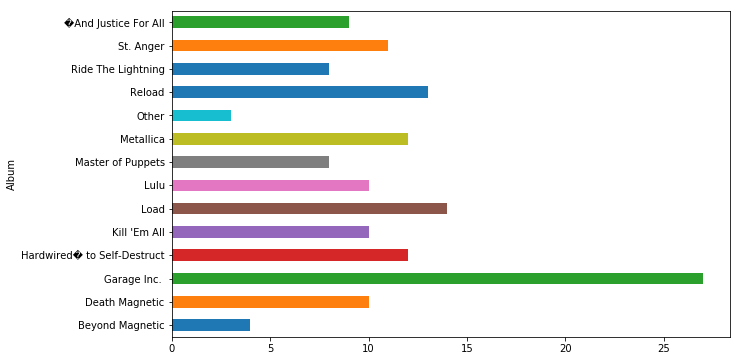

In [6]:
metallica.groupby("Album")["ID"].nunique().plot.barh(figsize=(10, 6));

Los ingredientes anteriormente utilizados fueron:

- fig (figure): Objeto figura, aquí se guardará todo para luego mostrarlo.
- ax (axis): Puedes pensar que son sub-gráficos dentro de la figura principal, en este caso solo hay uno.
- ax.barh(): Método aplicado al objeto _axis_ con tal de "dibujar" un gŕafico de barras horizontales. Los argumentos son los valores de los ejes x e y (en orden!).
- ax.set_??: Método para ir agregando elementos al objeto _axis_, tales como los labels de los ejes o el título,
- plt.show(): Buena práctica para mostrar la figura creada.

### Importante! Evita los Gráficos de Torta (o _Pie Charts_)
Los seres humanos somos mejores al dimensionar longitudes, no así áreas.

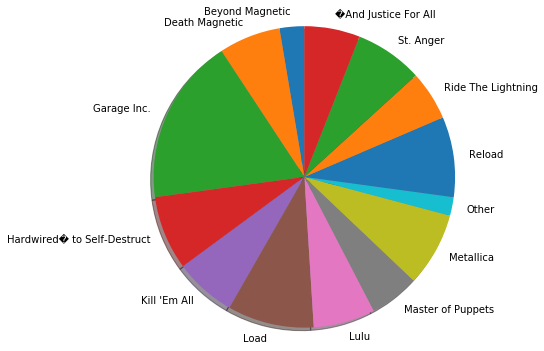

In [7]:
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(nm_songs, 
        labels=albums, 
        shadow=True, 
        startangle=90)
ax1.axis('equal')

plt.show()

Con el anterior pie-chart, ¿Podrías determinar rápidamente el álbum con más canciones entre _St.Anger_ y _Reload_? Luego mira el barplot de arriba, la respuesta es inmediata

### Gráfico de líneas (o _Line Plot_)

Útiles cuando se quieren graficas dos variables, una de ellas discreta y la otra discreta o continua.

Ejemplo: Cantidad de canciones por año. 

Nota que los años si tienen un orden, no así los álbumes (ejemplo anterior). Por lo mismo, es frecuente graficar las series de tiempo con line plots.

In [8]:
songs_by_year = metallica.groupby("Year")["ID"].nunique()
years = songs_by_year.index.values
nm_songs = songs_by_year.values

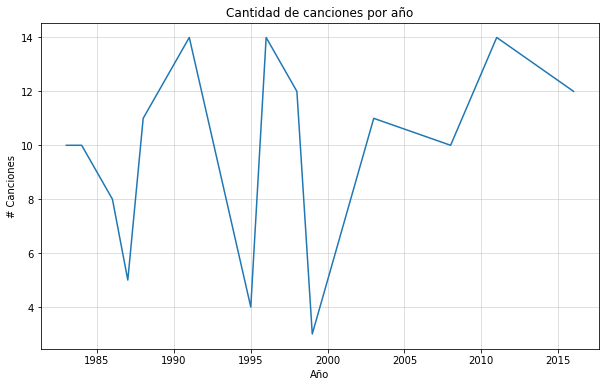

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, nm_songs)
ax.grid(alpha=0.5)
ax.set_xlabel("Año")
ax.set_ylabel("# Canciones")
ax.set_title("Cantidad de canciones por año")
plt.show()

### Histogramas

Útiles para ver la distribución de una variable numérica.

Ejemplo: Histograma de la cantidad de minutos de las canciones

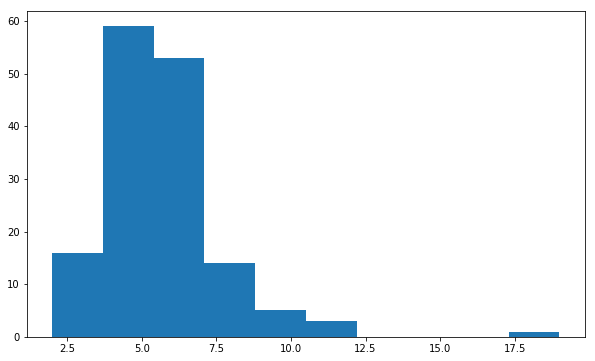

In [10]:
minutes = metallica["Minutes"].values
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(minutes)
plt.show()

### Gráficos de puntos (_Scatter Plot_)

Útiles cuando tienes por lo menos dos variables numéricas (con orden) e inclusive es posible agregar más variables, como color del punto (variable categórica), o tamaño del "punto" (variable numérica).

Ejemplo: Scatter plot de las canciones según su cantidad año, cantidad de _yeahs_ diferenciando el color si es que son de platino o no.

In [11]:
metallica["IsPlatinum"].unique()

array([0, 1])

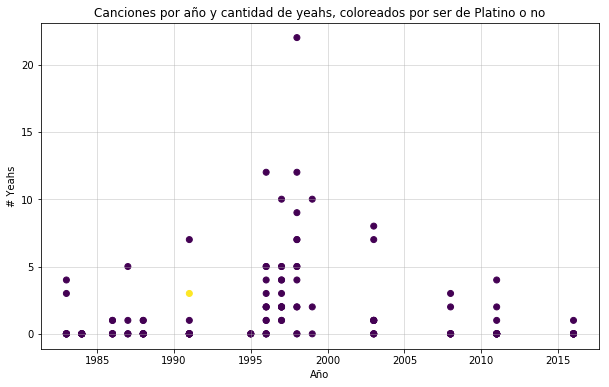

In [12]:
year_array = metallica["Year"].values
yeahs_array = metallica["Yeahs"].values
colors_array = metallica["IsPlatinum"].values

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(year_array, yeahs_array, c=colors_array)
ax.set_xlabel("Año")
ax.set_ylabel("# Yeahs")
ax.set_title("Canciones por año y cantidad de yeahs, coloreados por ser de Platino o no")
ax.grid(True, alpha=0.5)
plt.show()

## Ejercicios Parte 2

Consiste en escoger sabiamente el tipo de visualización, en preparar los ingredientes para crear finalmente crear las visualizaciones solicitadas a continuación. Recuerda poner los labels y títulos.

2.1 Crear un gráfico donde se visualice los álbumes y la cantidad total de segundos de cada uno de ellos.

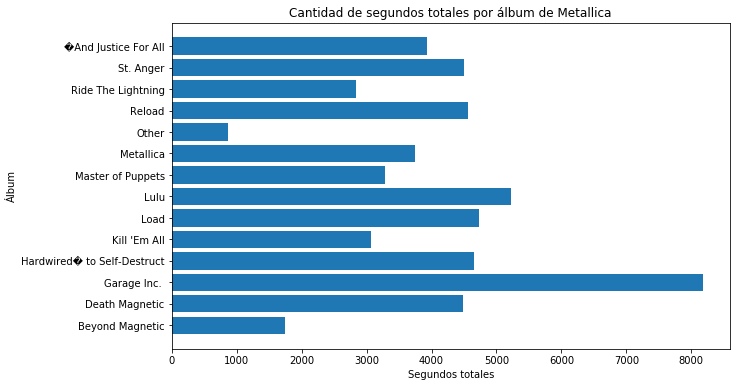

In [16]:
seconds_by_album = metallica.groupby("Album")["LengthInSeconds"].sum() 
albums = seconds_by_album.index.values
total_seconds = seconds_by_album.values

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(albums, total_seconds, align="center")
ax.set_xlabel("Segundos totales")
ax.set_ylabel("Álbum")
ax.set_title("Cantidad de segundos totales por álbum de Metallica")
plt.show()

2.2 Crear un gráfico donde se visualice la cantidad de canciones por año en la que Dave Mustaine tiene créditos asociados (tip: debes filtrar el dataframe antes).

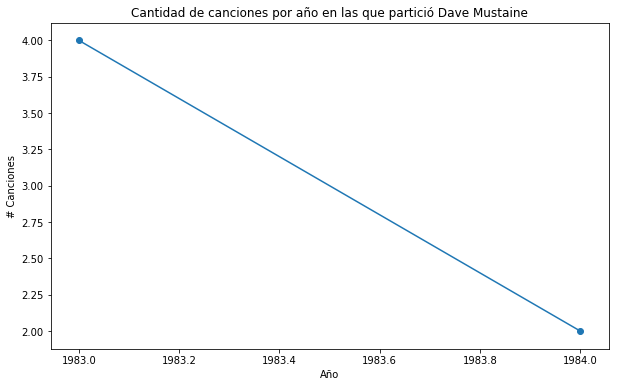

In [18]:
metallica_mustaine = metallica.loc[lambda x: x["DaveMustaine"] == 1].copy()
songs_by_year_dm = metallica_mustaine.groupby("Year")["ID"].nunique()
years_dm = songs_by_year_dm.index.values
nm_songs_dm = songs_by_year_dm.values

fig, ax = plt.subplots(figsize=(10, 6)) # FIX-ME PLEASE
ax.plot(years_dm, nm_songs_dm)
ax.scatter(years_dm, nm_songs_dm)
ax.set_xlabel("Año")
ax.set_ylabel("# Canciones")
ax.set_title("Cantidad de canciones por año en las que partició Dave Mustaine")
plt.show()

2.3 Propón y crea tu propia visualización de este genialísimo set de datos! Explica porque es interesante y útil.

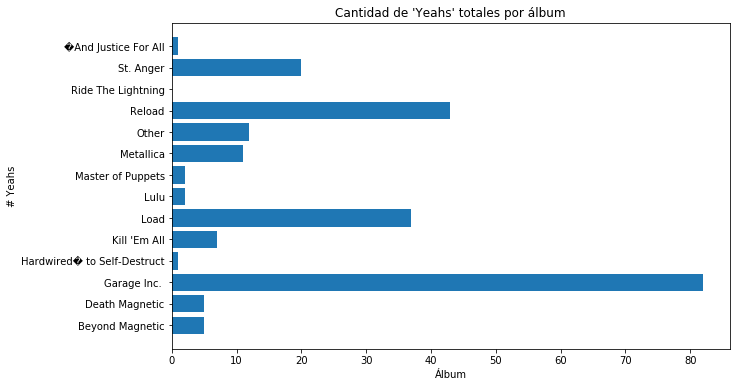

In [19]:
yeahs_per_album = metallica.groupby("Album")["Yeahs"].sum()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(yeahs_per_album.index.values, yeahs_per_album.values, align="center")
ax.set_xlabel("Álbum")
ax.set_ylabel("# Yeahs")
ax.set_title("Cantidad de 'Yeahs' totales por álbum")
plt.show()

__R:__ El gráfico que escogí es interesante porque muestra claramente la tendencia de "Yeahs" en distintos álbumes.

__Bonus!__ Si tienes tiempo y/o quieres, puedes proponer, crear y justificar una nueva visualización, de ser así tendrás un punto extra en un laboratorio a tu elección y en el que hayas estado presente.

In [14]:
metallica.columns

Index(['ID', 'AlbumID', 'Album', 'Song', 'Disc', 'TrackNumber', 'Year',
       'Yeahs', 'Minutes', 'Seconds', 'LengthInSeconds', 'YeahsPerSecond',
       'IsGold', 'IsPlatinum', 'JamesHetfield', 'LarsUlrich', 'KirkHammett',
       'CliffBurton', 'DaveMustaine', 'JasonNewstead', 'RobertTrujillo',
       'LouReed', 'PlayedLive'],
      dtype='object')

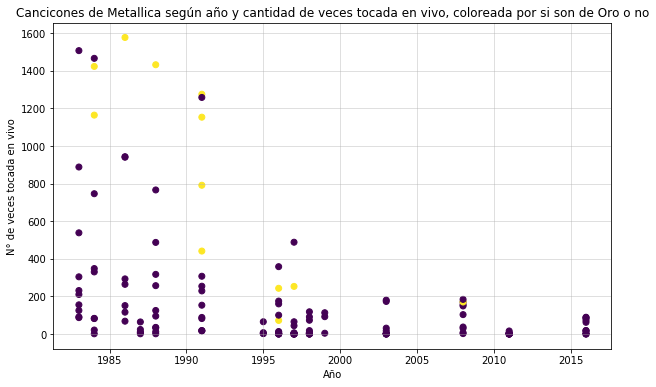

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(metallica["Year"].values, metallica["PlayedLive"].values, c=metallica["IsGold"].values)
ax.set_xlabel("Año")
ax.set_ylabel("N° de veces tocada en vivo")
ax.set_title("Cancicones de Metallica según año y cantidad de veces tocada en vivo, coloreada por si son de Oro o no")
ax.grid(True, alpha=0.5)
plt.show()

__R:__ El gráfico que escogí es interesante porque la mayoría de las canciones de oro son las que más se tocan dentro de las que fueron estrenadas el mismo año, aunque hay excepciones.